## Compare Network Architectures

Now that we have a reasonable baseline for our EasyDeepFakes dataset, let's try to improve performance. For starters, let's just compare how a variety of networks perform on this dataset. We will try:

 - ResNet
 - XResNet
 - EfficientNet
 - MesoNet
 - XceptionNet

In [1]:
from fastai.core import *
from fastai.vision import *

In [2]:
path = Path('../data/EasyDeepFakes')
src = ImageList.from_folder(path).split_by_folder(train='train', valid='val')

In [3]:
def get_data(bs,size):
    data = (src.label_from_re('([A-Z]+).png$')
           .transform(get_transforms(max_warp=0, max_zoom=1), size=size)
           .databunch(bs=bs).normalize(imagenet_stats))
    return data

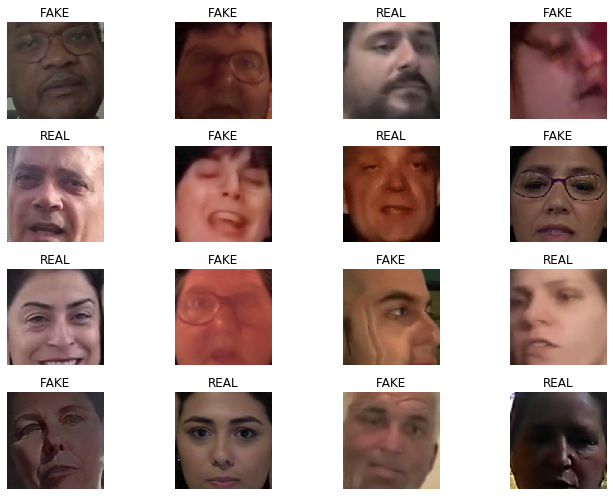

In [4]:
bs, sz = 32, 256
data = get_data(bs, sz)
data.show_batch(rows=4, figsize=(10,7))

# ResNet

The ResNet architecture is one of the most common and trusted baseline architectures. We will use it to establish a reasonable baseline for performance and compare our other networks to it.

### ResNet18

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


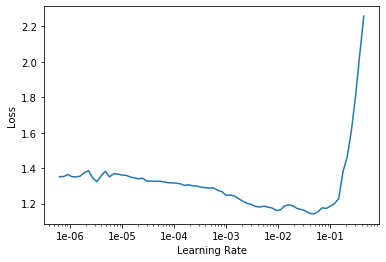

In [15]:
from fastai.vision.models import resnet18
learner = cnn_learner(data, resnet18, metrics=[accuracy])
learner.lr_find()
learner.recorder.plot()

In [16]:
# Train only the head of the network
learner.fit_one_cycle(5, 1e-3)
# Unfreeze other layers and train the entire network
learner.unfreeze()
learner.fit_one_cycle(20, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.203302,0.564381,0.739241,00:05
1,0.857638,0.517912,0.784810,00:05
2,0.660681,0.501943,0.807595,00:05
3,0.543870,0.480822,0.792405,00:05
4,0.437846,0.496397,0.797468,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.356530,0.496439,0.794937,00:05
1,0.346490,0.487134,0.825316,00:05
2,0.306800,0.436696,0.825316,00:06
3,0.248365,0.434641,0.840506,00:05
4,0.202601,0.677851,0.815190,00:05
5,0.183838,0.652940,0.827848,00:05
6,0.138292,0.720689,0.807595,00:05
7,0.096323,0.635189,0.817722,00:05
8,0.075688,0.632027,0.835443,00:05
9,0.066582,0.853311,0.779747,00:05


ResNet18 gets a final accuracy of **85.6%** and a peak accuracy of **86.8%**

### ResNet34

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


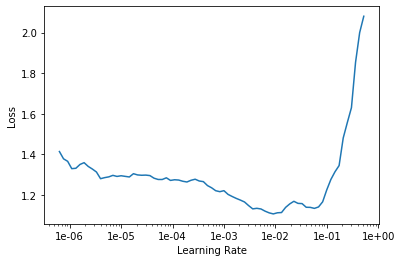

In [49]:
from fastai.vision.models import resnet34
learner = cnn_learner(data, resnet34, metrics=[accuracy])
learner.lr_find()
learner.recorder.plot()

In [50]:
# Train only the head of the network
learner.fit_one_cycle(5, 1e-3)
# Unfreeze other layers and train the entire network
learner.unfreeze()
learner.fit_one_cycle(20, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.958503,0.661156,0.718987,00:06
1,0.755574,0.765924,0.736709,00:06
2,0.590782,0.572312,0.739241,00:06
3,0.480963,0.511097,0.787342,00:06
4,0.419064,0.521965,0.792405,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.345542,0.459080,0.797468,00:07
1,0.313737,0.446508,0.820253,00:07
2,0.245542,0.467303,0.802532,00:07
3,0.239940,0.509316,0.825316,00:07
4,0.195766,0.628182,0.830380,00:07
5,0.163540,0.525855,0.830380,00:07
6,0.116998,0.558112,0.875949,00:07
7,0.085443,0.821804,0.817722,00:07
8,0.070584,0.642564,0.848101,00:07
9,0.052709,0.482038,0.870886,00:07


ResNet34 has a final accuracy of **87.6%** and a peak accuracy of **89.1%**

### ResNet50

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


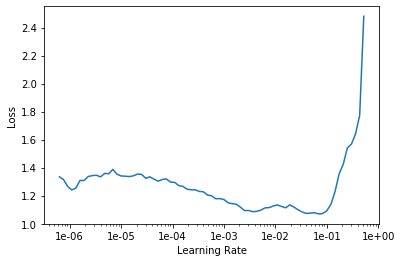

In [5]:
from fastai.vision.models import resnet50
learner = cnn_learner(data, resnet50, metrics=[accuracy])
learner.lr_find()
learner.recorder.plot()

In [6]:
# Train only the head of the network
learner.fit_one_cycle(5, 5e-3)
# Unfreeze other layers and train the entire network
learner.unfreeze()
learner.fit_one_cycle(20, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.912481,0.728619,0.772152,00:10
1,0.573927,0.521066,0.843038,00:10
2,0.335350,0.445755,0.825316,00:10
3,0.196442,0.409799,0.883544,00:10
4,0.125492,0.388655,0.873418,00:10


epoch,train_loss,valid_loss,accuracy,time
0,0.081885,0.340194,0.878481,00:14
1,0.065828,0.360895,0.873418,00:13
2,0.079378,0.519015,0.855696,00:13
3,0.108517,0.710190,0.843038,00:13
4,0.107574,0.662178,0.853165,00:13
5,0.092131,0.366853,0.875949,00:13
6,0.083454,0.415337,0.883544,00:12
7,0.069106,0.454095,0.865823,00:13
8,0.067296,0.334320,0.903797,00:13
9,0.052893,0.259954,0.911392,00:13


ResNet50 has a final accuracy of **91.1%** and a peak accuracy of **91.1%**.

# XResNet

`xresnet` is modified resnet architecture developed by fast.ai in according with the paper [Bag of Tricks for Image Classification with Convolutional Neural Networks](https://arxiv.org/abs/1812.01187).

Notably the initial 7x7 conv is replaced by a series of 3x3 convolutions. I believe they have also changed some of the 1x1 convolutions in the bottleneck layers.


**NOTE:** In fastai v1, there is no pretrained model for xresnet.

### XResNet18

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


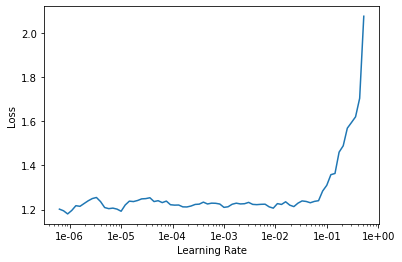

In [6]:
from fastai.vision.models import xresnet18
learner = cnn_learner(data, xresnet18, metrics=[accuracy], pretrained=False)
learner.lr_find()
learner.recorder.plot()

In [7]:
# Train only the head of the network
learner.fit_one_cycle(5, 1e-3)
# Unfreeze other layers and train the entire network
learner.unfreeze()
learner.fit_one_cycle(20, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.114183,0.828836,0.600000,00:06
1,1.073079,1.057362,0.627848,00:06
2,0.992563,0.818523,0.615190,00:06
3,0.858570,0.896624,0.673418,00:06
4,0.791091,0.744888,0.663291,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.741210,0.737723,0.681013,00:06
1,0.740814,0.773216,0.663291,00:06
2,0.728545,0.889230,0.630380,00:06
3,0.721527,0.714366,0.668354,00:06
4,0.714762,0.834876,0.620253,00:06
5,0.695177,0.795048,0.698734,00:06
6,0.666004,0.734757,0.670886,00:06
7,0.648648,0.801027,0.650633,00:06
8,0.645359,0.753322,0.650633,00:06
9,0.622439,0.837570,0.637975,00:06


(Non-pretrained) XResNet18 gets a final accuracy of **65.0%** and a peak accuracy of **68.4%**.

### XResNet34

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


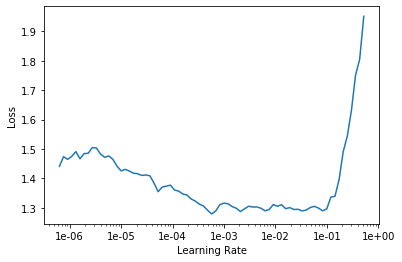

In [7]:
from fastai.vision.models import xresnet34
learner = cnn_learner(data, xresnet34, metrics=[accuracy], pretrained=False)
learner.lr_find()
learner.recorder.plot()

In [8]:
# Train only the head of the network
learner.fit_one_cycle(5, 1e-3)
# Unfreeze other layers and train the entire network
learner.unfreeze()
learner.fit_one_cycle(20, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.216541,0.877240,0.567089,00:08
1,1.130275,0.792915,0.579747,00:08
2,1.004897,0.828638,0.655696,00:08
3,0.882788,0.703561,0.693671,00:08
4,0.796264,0.777555,0.653165,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.730668,0.757488,0.678481,00:08
1,0.713024,0.742544,0.630380,00:08
2,0.707171,0.701951,0.660760,00:08
3,0.713724,0.742874,0.691139,00:08
4,0.688743,0.792711,0.632911,00:08
5,0.669042,0.690326,0.663291,00:08
6,0.669515,0.655466,0.706329,00:09
7,0.635943,0.668280,0.675949,00:08
8,0.623798,0.940863,0.620253,00:08
9,0.612775,0.610717,0.734177,00:08


`xresnet34` has a final accuracy of **68.9%** and a peak accuracy of **73.4%**.

### XResNet50

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


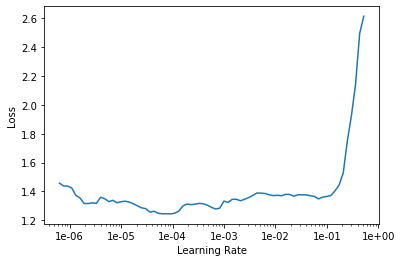

In [9]:
from fastai.vision.models import xresnet50
learner = cnn_learner(data, xresnet50, metrics=[accuracy], pretrained=False)
learner.lr_find()
learner.recorder.plot()

In [10]:
# Train only the head of the network
learner.fit_one_cycle(5, 1e-3)
# Unfreeze other layers and train the entire network
learner.unfreeze()
learner.fit_one_cycle(20, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.247287,1.379327,0.597468,00:14
1,1.145156,1.335484,0.630380,00:14
2,1.002585,0.922947,0.602532,00:13
3,0.883533,0.830987,0.655696,00:14
4,0.786434,0.825927,0.688608,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.750956,0.866681,0.675949,00:14
1,0.727133,0.783911,0.678481,00:14
2,0.713127,1.041397,0.597468,00:13
3,0.737316,0.767482,0.625316,00:13
4,0.730618,0.924852,0.643038,00:13
5,0.687140,0.964155,0.640506,00:13
6,0.664970,0.913538,0.660760,00:13
7,0.636198,0.913387,0.643038,00:14
8,0.622653,0.713152,0.615190,00:14
9,0.609533,0.703776,0.650633,00:14


`xresnet50` has a final accuracy of **71.1%** and a peak accuracy of **72.7%**.

# EfficientNet

EfficientNet is an architecture released by Google with the intention of reducing the number of parameters while maintaining good performance. There are 8 versions of Efficient with increasing capacity from `efficientb0` to `efficientnetb7`.

I haven't figured out how to set up layer groups so I'm unable to do discriminitive learning with EfficientNet, but we'll give it a shot anyways.

In [12]:
# !pip install efficientnet-pytorch
from efficientnet_pytorch import EfficientNet

### EfficientNetB0

Loaded pretrained weights for efficientnet-b0


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


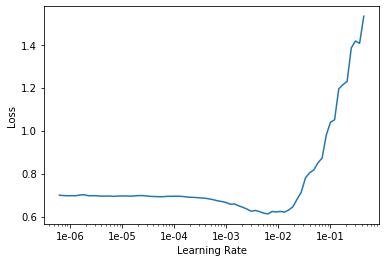

In [26]:
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=data.c)
learner = Learner(data, model, metrics=[accuracy])

learner.lr_find()
learner.recorder.plot()

In [27]:
# Train only the head of the network
learner.fit_one_cycle(5, 1e-3)
# Unfreeze other layers and train the entire network
learner.unfreeze()

#NOTE: Not using discriminitive learning rates!
learner.fit_one_cycle(20, max_lr=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.516240,1.271193,0.632911,00:12
1,0.331595,1.612891,0.741772,00:12
2,0.187607,1.366880,0.810127,00:12
3,0.115537,0.689660,0.822785,00:12
4,0.061597,0.399329,0.888608,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.027880,0.352949,0.891139,00:12
1,0.025729,0.323104,0.893671,00:12
2,0.027121,0.285701,0.903797,00:12
3,0.021455,0.316797,0.908861,00:12
4,0.019400,0.324412,0.911392,00:12
5,0.018255,0.314633,0.891139,00:12
6,0.015387,0.322790,0.888608,00:12
7,0.011081,0.271832,0.901266,00:12
8,0.010843,0.218813,0.918987,00:12
9,0.008117,0.241295,0.921519,00:12


`efficientnetb0` has a final accuracy of **91.1%** and a peak accuracy of **92.7%**.

### EfficientNetB1

Loaded pretrained weights for efficientnet-b1


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


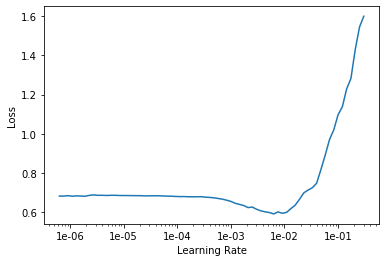

In [13]:
model = EfficientNet.from_pretrained('efficientnet-b1', num_classes=data.c)
learner = Learner(data, model, metrics=[accuracy])

learner.lr_find()
learner.recorder.plot()

In [14]:
# Train only the head of the network
learner.fit_one_cycle(5, 1e-3)
# Unfreeze other layers and train the entire network
learner.unfreeze()

#NOTE: Not using discriminitive learning rates!
learner.fit_one_cycle(20, max_lr=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.501513,1.006017,0.645570,00:16
1,0.306138,1.214853,0.784810,00:15
2,0.200345,0.362082,0.855696,00:15
3,0.103899,0.958630,0.825316,00:15
4,0.060935,0.526223,0.886076,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.033017,0.429880,0.898734,00:15
1,0.027984,0.401404,0.901266,00:15
2,0.021753,0.355001,0.903797,00:15
3,0.017813,0.355930,0.911392,00:15
4,0.015071,0.444192,0.901266,00:15
5,0.012078,0.335960,0.921519,00:15
6,0.007959,0.335083,0.924051,00:15
7,0.010505,0.416681,0.898734,00:15
8,0.007557,0.452978,0.911392,00:15
9,0.012271,0.459742,0.908861,00:15


`efficientnetb1` hsa an final accuracy of **91.9%** and a peak accuracy of **93.7%**

### EfficientNetB2

Downloading: "https://publicmodels.blob.core.windows.net/container/aa/efficientnet-b2-8bb594d6.pth" to /home/josh/.cache/torch/checkpoints/efficientnet-b2-8bb594d6.pth



Loaded pretrained weights for efficientnet-b2


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


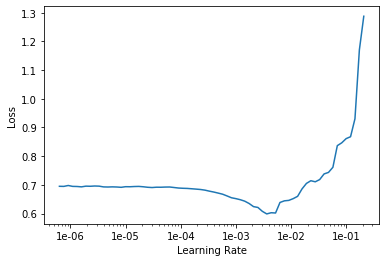

In [15]:
model = EfficientNet.from_pretrained('efficientnet-b2', num_classes=data.c)
learner = Learner(data, model, metrics=[accuracy])

learner.lr_find()
learner.recorder.plot()

In [16]:
# Train only the head of the network
learner.fit_one_cycle(5, 1e-3)
# Unfreeze other layers and train the entire network
learner.unfreeze()

#NOTE: Not using discriminitive learning rates!
learner.fit_one_cycle(20, max_lr=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.482357,0.703029,0.716456,00:17
1,0.280389,4.190239,0.762025,00:17
2,0.169633,1.353712,0.815190,00:17
3,0.095515,2.290061,0.800000,00:17
4,0.054102,1.195456,0.853165,00:16


epoch,train_loss,valid_loss,accuracy,time
0,0.019861,0.858294,0.870886,00:16
1,0.023328,0.665454,0.881013,00:17
2,0.022451,0.663991,0.875949,00:16
3,0.018246,0.578666,0.886076,00:16
4,0.012721,0.511902,0.901266,00:16
5,0.010725,0.523225,0.888608,00:16
6,0.022450,0.479920,0.903797,00:16
7,0.017500,0.515480,0.903797,00:16
8,0.013854,0.554076,0.873418,00:16
9,0.007897,0.492411,0.875949,00:16


`efficientnetb2` get an final accuracy of **89.4%** and a peak accuracy of **90.1%**.

## MesoNet

MesoNet was developed to detect deep fakes in the [MesoNet: a Compact Facial Video Forgery Detection Network](https://arxiv.org/abs/1809.00888) paper.

Like EfficientNet, I'm unsure how to build layer groups, so we will not use discriminitive fine tuning on this network.

In [33]:
#export
# By Nathan Hubens.
# Paper implementation does not use Adaptive Average Pooling. To get the exact same implementation, 
# comment the avg_pool and uncomment the final max_pool layer.
class MesoNet(nn.Module):
    def __init__(self):
        super().__init__()
          
        self.conv1 = nn.Conv2d(3, 8, 3, 1,1) # 8 x 256 x 256
        self.bn1 = nn.BatchNorm2d(8)
        self.conv2 = nn.Conv2d(8, 8, 5, 1,2) # 8 x 128 x 128
        self.bn2 = nn.BatchNorm2d(8)
        self.conv3 = nn.Conv2d(8, 16, 5, 1,2) # 8 x 64 x 64
        self.bn3 = nn.BatchNorm2d(16)
        self.conv4 = nn.Conv2d(16,16,5,1,2) # 8 x 32 x 32
        self.bn4 = nn.BatchNorm2d(16)
        self.avg_pool = nn.AdaptiveAvgPool2d((8))
        self.fc1 = nn.Linear(1024, 16)
        self.fc2 = nn.Linear(16, 2)
    
    def forward(self, x):

        x = F.relu(self.conv1(x))
        x = self.bn1(x)
        x = F.max_pool2d(x, 2, 2)
        
        x = F.relu(self.conv2(x))
        x = self.bn2(x)
        x = F.max_pool2d(x, 2, 2)
        
        x = F.relu(self.conv3(x))  
        x = self.bn3(x)
        x = F.max_pool2d(x, 2, 2)
        
        x = F.relu(self.conv4(x))
        x = self.bn4(x)
        #x = F.max_pool2d(x, 4, 4)
        
        x = self.avg_pool(x)

        x = x.reshape(x.shape[0], -1)

        x = F.dropout(x, 0.5)
        x = F.relu(self.fc1(x))
        x = F.dropout(x,0.5)
        x = self.fc2(x)
        return x

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


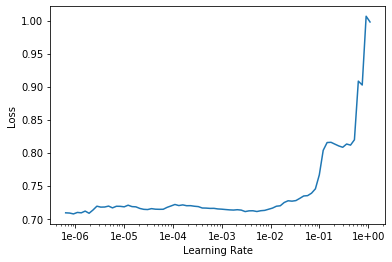

In [30]:
model = MesoNet()
learner = Learner(data, model, metrics=[accuracy])

learner.lr_find()
learner.recorder.plot()

In [34]:
# Train only the head of the network
learner.fit_one_cycle(5, 1e-3)
# Unfreeze other layers and train the entire network
learner.unfreeze()

#NOTE: Not using discriminitive learning rates!
learner.fit_one_cycle(20, max_lr=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.596906,0.663416,0.640506,00:05
1,0.626895,0.617109,0.625316,00:05
2,0.625053,0.596258,0.655696,00:05
3,0.617112,0.660303,0.645570,00:05
4,0.604866,0.624080,0.650633,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.602584,0.608958,0.670886,00:05
1,0.603911,0.623546,0.650633,00:05
2,0.595289,0.616168,0.663291,00:05
3,0.595537,0.615936,0.653165,00:05
4,0.596959,0.578529,0.658228,00:05
5,0.599921,0.651059,0.648101,00:05
6,0.599315,0.638299,0.650633,00:05
7,0.595482,0.626093,0.653165,00:05
8,0.595715,0.615758,0.645570,00:05
9,0.590971,0.654940,0.630380,00:05


`mesonet` has a final accuracy of **65.6%** and a peak accuracy of **67.6%**.

## XceptionNet

[XceptionNet](https://arxiv.org/abs/1610.02357) was developed to be a more performant version of Google's InceptionNet. They replace Inception modules with depthwise separable convolution modules.

It was also the best performing model used in [FaceForensics++: Learning to Detect Manipulated Facial Images](https://arxiv.org/abs/1901.08971).

In [35]:
## xception.py
"""
Ported to pytorch thanks to [tstandley](https://github.com/tstandley/Xception-PyTorch)
@author: tstandley
Adapted by cadene
Creates an Xception Model as defined in:
Francois Chollet
Xception: Deep Learning with Depthwise Separable Convolutions
https://arxiv.org/pdf/1610.02357.pdf
This weights ported from the Keras implementation. Achieves the following performance on the validation set:
Loss:0.9173 Prec@1:78.892 Prec@5:94.292
REMEMBER to set your image size to 3x299x299 for both test and validation
normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                  std=[0.5, 0.5, 0.5])
The resize parameter of the validation transform should be 333, and make sure to center crop at 299x299
"""
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.model_zoo as model_zoo
from torch.nn import init

pretrained_settings = {
    'xception': {
        'imagenet': {
            'url': 'http://data.lip6.fr/cadene/pretrainedmodels/xception-b5690688.pth',
            'input_space': 'RGB',
            'input_size': [3, 299, 299],
            'input_range': [0, 1],
            'mean': [0.5, 0.5, 0.5],
            'std': [0.5, 0.5, 0.5],
            'num_classes': 1000,
            'scale': 0.8975 # The resize parameter of the validation transform should be 333, and make sure to center crop at 299x299
        }
    }
}


class SeparableConv2d(nn.Module):
    def __init__(self,in_channels,out_channels,kernel_size=1,stride=1,padding=0,dilation=1,bias=False):
        super(SeparableConv2d,self).__init__()

        self.conv1 = nn.Conv2d(in_channels,in_channels,kernel_size,stride,padding,dilation,groups=in_channels,bias=bias)
        self.pointwise = nn.Conv2d(in_channels,out_channels,1,1,0,1,1,bias=bias)

    def forward(self,x):
        x = self.conv1(x)
        x = self.pointwise(x)
        return x


class Block(nn.Module):
    def __init__(self,in_filters,out_filters,reps,strides=1,start_with_relu=True,grow_first=True):
        super(Block, self).__init__()

        if out_filters != in_filters or strides!=1:
            self.skip = nn.Conv2d(in_filters,out_filters,1,stride=strides, bias=False)
            self.skipbn = nn.BatchNorm2d(out_filters)
        else:
            self.skip=None

        self.relu = nn.ReLU(inplace=True)
        rep=[]

        filters=in_filters
        if grow_first:
            rep.append(self.relu)
            rep.append(SeparableConv2d(in_filters,out_filters,3,stride=1,padding=1,bias=False))
            rep.append(nn.BatchNorm2d(out_filters))
            filters = out_filters

        for i in range(reps-1):
            rep.append(self.relu)
            rep.append(SeparableConv2d(filters,filters,3,stride=1,padding=1,bias=False))
            rep.append(nn.BatchNorm2d(filters))

        if not grow_first:
            rep.append(self.relu)
            rep.append(SeparableConv2d(in_filters,out_filters,3,stride=1,padding=1,bias=False))
            rep.append(nn.BatchNorm2d(out_filters))

        if not start_with_relu:
            rep = rep[1:]
        else:
            rep[0] = nn.ReLU(inplace=False)

        if strides != 1:
            rep.append(nn.MaxPool2d(3,strides,1))
        self.rep = nn.Sequential(*rep)

    def forward(self,inp):
        x = self.rep(inp)

        if self.skip is not None:
            skip = self.skip(inp)
            skip = self.skipbn(skip)
        else:
            skip = inp

        x+=skip
        return x


class Xception(nn.Module):
    """
    Xception optimized for the ImageNet dataset, as specified in
    https://arxiv.org/pdf/1610.02357.pdf
    """
    def __init__(self, num_classes=1000):
        """ Constructor
        Args:
            num_classes: number of classes
        """
        super(Xception, self).__init__()
        self.num_classes = num_classes

        self.conv1 = nn.Conv2d(3, 32, 3,2, 0, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU(inplace=True)

        self.conv2 = nn.Conv2d(32,64,3,bias=False)
        self.bn2 = nn.BatchNorm2d(64)
        #do relu here

        self.block1=Block(64,128,2,2,start_with_relu=False,grow_first=True)
        self.block2=Block(128,256,2,2,start_with_relu=True,grow_first=True)
        self.block3=Block(256,728,2,2,start_with_relu=True,grow_first=True)

        self.block4=Block(728,728,3,1,start_with_relu=True,grow_first=True)
        self.block5=Block(728,728,3,1,start_with_relu=True,grow_first=True)
        self.block6=Block(728,728,3,1,start_with_relu=True,grow_first=True)
        self.block7=Block(728,728,3,1,start_with_relu=True,grow_first=True)

        self.block8=Block(728,728,3,1,start_with_relu=True,grow_first=True)
        self.block9=Block(728,728,3,1,start_with_relu=True,grow_first=True)
        self.block10=Block(728,728,3,1,start_with_relu=True,grow_first=True)
        self.block11=Block(728,728,3,1,start_with_relu=True,grow_first=True)

        self.block12=Block(728,1024,2,2,start_with_relu=True,grow_first=False)

        self.conv3 = SeparableConv2d(1024,1536,3,1,1)
        self.bn3 = nn.BatchNorm2d(1536)

        #do relu here
        self.conv4 = SeparableConv2d(1536,2048,3,1,1)
        self.bn4 = nn.BatchNorm2d(2048)

        self.fc = nn.Linear(2048, num_classes)

        # #------- init weights --------
        # for m in self.modules():
        #     if isinstance(m, nn.Conv2d):
        #         n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
        #         m.weight.data.normal_(0, math.sqrt(2. / n))
        #     elif isinstance(m, nn.BatchNorm2d):
        #         m.weight.data.fill_(1)
        #         m.bias.data.zero_()
        # #-----------------------------

    def features(self, input):
        x = self.conv1(input)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)

        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        x = self.block6(x)
        x = self.block7(x)
        x = self.block8(x)
        x = self.block9(x)
        x = self.block10(x)
        x = self.block11(x)
        x = self.block12(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)

        x = self.conv4(x)
        x = self.bn4(x)
        return x

    def logits(self, features):
        x = self.relu(features)

        x = F.adaptive_avg_pool2d(x, (1, 1))
        x = x.view(x.size(0), -1)
        x = self.last_linear(x)
        return x

    def forward(self, input):
        x = self.features(input)
        x = self.logits(x)
        return x


def xception(num_classes=1000, pretrained='imagenet'):
    model = Xception(num_classes=num_classes)
    if pretrained:
        settings = pretrained_settings['xception'][pretrained]
        assert num_classes == settings['num_classes'], \
            "num_classes should be {}, but is {}".format(settings['num_classes'], num_classes)

        model = Xception(num_classes=num_classes)
        model.load_state_dict(model_zoo.load_url(settings['url']))

        model.input_space = settings['input_space']
        model.input_size = settings['input_size']
        model.input_range = settings['input_range']
        model.mean = settings['mean']
        model.std = settings['std']

    # TODO: ugly
    model.last_linear = model.fc
    del model.fc
    return model

In [38]:
XCEPTION_MODEL = 'xception/xception-b5690688.pth'

def return_pytorch04_xception(pretrained=True):
    # Raises warning "src not broadcastable to dst" but thats fine
    model = xception(pretrained=False)
    if pretrained:
        # Load model in torch 0.4+
        model.fc = model.last_linear
        del model.last_linear
        state_dict = torch.load(
            XCEPTION_MODEL)
        for name, weights in state_dict.items():
            if 'pointwise' in name:
                state_dict[name] = weights.unsqueeze(-1).unsqueeze(-1)
        model.load_state_dict(state_dict)
        model.last_linear = model.fc
        del model.fc
    return model

In [46]:
model = return_pytorch04_xception()
model.last_linear = torch.nn.Linear(in_features=2048, out_features=2, bias=True)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


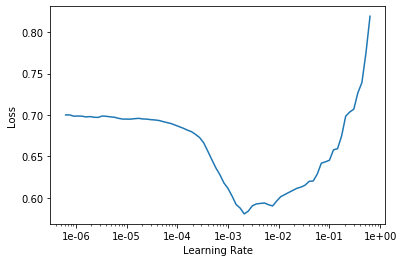

In [47]:
learner = Learner(data, model, metrics=[accuracy])

learner.lr_find()
learner.recorder.plot()

In [48]:
# Train only the head of the network
learner.fit_one_cycle(5, 1e-3)
# Unfreeze other layers and train the entire network
learner.unfreeze()

#NOTE: Not using discriminitive learning rates!
learner.fit_one_cycle(20, max_lr=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.414747,0.550807,0.784810,00:21
1,0.284067,1.861767,0.686076,00:21
2,0.180892,0.653981,0.744304,00:21
3,0.089744,0.835258,0.797468,00:21
4,0.060327,0.550457,0.825316,00:22


epoch,train_loss,valid_loss,accuracy,time
0,0.023186,0.519723,0.832911,00:21
1,0.015454,0.540807,0.830380,00:21
2,0.011944,0.635909,0.830380,00:22
3,0.015918,0.688293,0.850633,00:21
4,0.009869,0.631550,0.830380,00:21
5,0.007204,0.742549,0.843038,00:21
6,0.013803,0.563675,0.850633,00:21
7,0.006453,0.661981,0.845570,00:21
8,0.003437,0.672849,0.865823,00:21
9,0.007855,0.885274,0.840506,00:21


XceptionNet has a final accuracy of **83.5%** and a peak accuracy of **86.8%**.

## Results

|Network         | Pretrained     | Discriminitive | Final Accuracy % | Peak Accuracy %| Time for 1 Epoch (s) |
|----------------|----------------|----------------|------------------|----------------|----------------------|
|`resnet18`      |   True         |   True         | 85.6             | 86.8           | **5**                |
|`resnet34`      |   True         |   True         | 87.6             | 89.1           | 7                    |
|`resnet50`      |   True         |   True         | 91.1             | 91.1           | 13                   |
|`xresnet18`     |   False        |   True         | 65.0             | 68.4           | 6                    |
|`xresnet34`     |   False        |   True         | 68.9             | 73.4           | 8                    |
|`xresnet50`     |   False        |   True         | 71.1             | 72.7           | 14                   |
|`efficientnetb0`|   True         |   False        | 91.1             | 92.7           | 12                   |
|`efficientnetb1`|   True         |   False        | **91.9**         | **93.7**       | 15                   |
|`efficientnetb2`|   True         |   False        | 89.4             | 90.1           | 16                   |
| `mesonet`      |   False        |   False        | 65.6             | 67.6           | **5**                |
| `xceptionnet`  |   True         |   False        | 83.5             | 86.8           | 21                   |